In [15]:
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
import os
import networkx as nx
from subprocess import check_output
%matplotlib inline

In [16]:
data = pd.read_csv('/Users/arslanaliawan/Desktop/scripts/countries-of-the-world/countries-of-the-world.csv')
data.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
Country                               227 non-null object
Region                                227 non-null object
Population                            227 non-null int64
Area (sq. mi.)                        227 non-null int64
Pop. Density (per sq. mi.)            227 non-null object
Coastline (coast/area ratio)          227 non-null object
Net migration                         224 non-null object
Infant mortality (per 1000 births)    224 non-null object
GDP ($ per capita)                    226 non-null float64
Literacy (%)                          209 non-null object
Phones (per 1000)                     223 non-null object
Arable (%)                            225 non-null object
Crops (%)                             225 non-null object
Other (%)                             225 non-null object
Climate                               205 non-null object
Birthrate                 

In [18]:
data.shape

(227, 20)

In [19]:
data.describe()

,Population,Area (sq. mi.),GDP ($ per capita)
count,2.270000e+02,2.270000e+02,226.000000
mean,2.874028e+07,5.982270e+05,9689.823009
std,1.178913e+08,1.790282e+06,10049.138513
min,7.026000e+03,2.000000e+00,500.000000
25%,4.376240e+05,4.647500e+03,1900.000000
50%,4.786994e+06,8.660000e+04,5550.000000
75%,1.749777e+07,4.418110e+05,15700.000000
max,1.313974e+09,1.707520e+07,55100.000000


In [20]:
data.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [21]:
data.corr()

,Population,Area (sq. mi.),GDP ($ per capita)
Population,1.000000,0.469985,-0.039324
Area (sq. mi.),0.469985,1.000000,0.072185
GDP ($ per capita),-0.039324,0.072185,1.000000


In [22]:
data.isnull().any()

Country                               False
Region                                False
Population                            False
Area (sq. mi.)                        False
Pop. Density (per sq. mi.)            False
Coastline (coast/area ratio)          False
Net migration                          True
Infant mortality (per 1000 births)     True
GDP ($ per capita)                     True
Literacy (%)                           True
Phones (per 1000)                      True
Arable (%)                             True
Crops (%)                              True
Other (%)                              True
Climate                                True
Birthrate                              True
Deathrate                              True
Agriculture                            True
Industry                               True
Service                                True
dtype: bool

In [24]:
data.fillna(0.0, inplace = True)

In [25]:
data.isnull().any()

Country                               False
Region                                False
Population                            False
Area (sq. mi.)                        False
Pop. Density (per sq. mi.)            False
Coastline (coast/area ratio)          False
Net migration                         False
Infant mortality (per 1000 births)    False
GDP ($ per capita)                    False
Literacy (%)                          False
Phones (per 1000)                     False
Arable (%)                            False
Crops (%)                             False
Other (%)                             False
Climate                               False
Birthrate                             False
Deathrate                             False
Agriculture                           False
Industry                              False
Service                               False
dtype: bool

In [26]:
data.corr()

,Population,Area (sq. mi.),GDP ($ per capita)
Population,1.000000,0.469985,-0.038208
Area (sq. mi.),0.469985,1.000000,0.072823
GDP ($ per capita),-0.038208,0.072823,1.000000


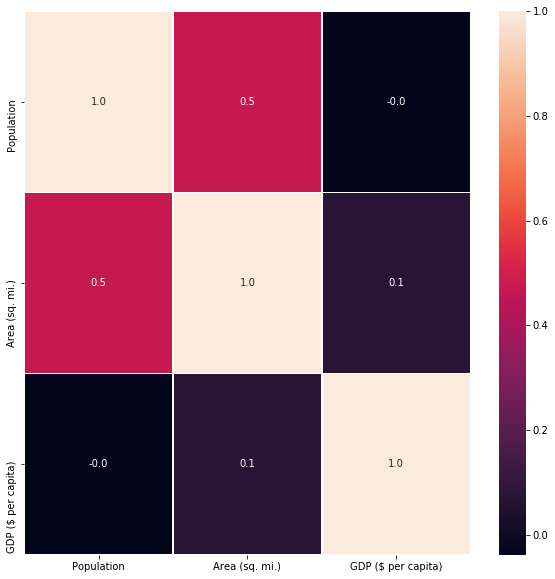

In [27]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

[]

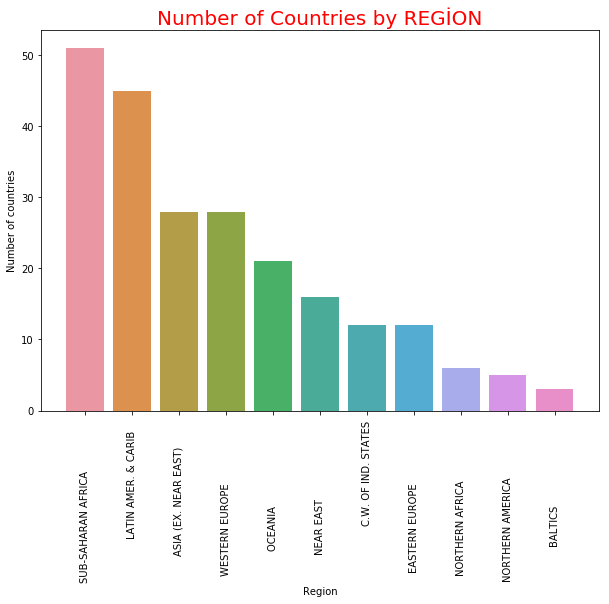

In [28]:
region = data["Region"].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=region.index,y=region.values)
plt.xticks(rotation=90)
plt.ylabel('Number of countries')
plt.xlabel('Region')
plt.title('Number of Countries by REGİON',color = 'red',fontsize=20)
plt.plot()

In [31]:
s = set(data["Country"])
len(s)
# l=data['Country'].map(str).apply(len)
# len(l)


227

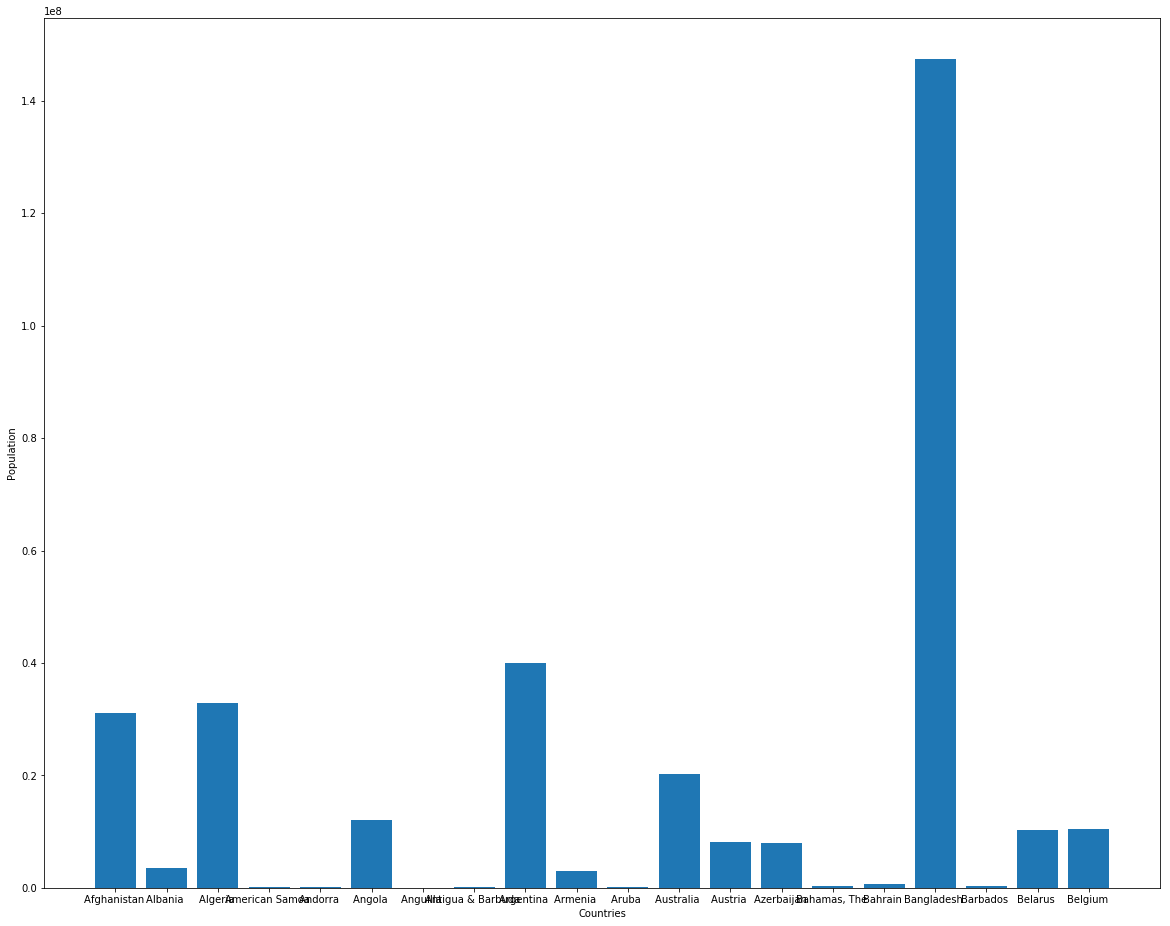

In [114]:
 rows = 20
data = pd.read_csv('/Users/arslanaliawan/Desktop/scripts/countries-of-the-world/countries-of-the-world.csv',nrows =rows)
# index=list('ab')
# data[data['Country'][pd.Series(index,data['Country']).str.startswith('A')]]

# dictionary = dict()
# for i in range(1,len(s)):
#     dictionary.update(data[data['Country'][pd.Series(data['Country']).str.startswith('P')]])
    

# index=list('AB')
# df = pd.DataFrame(columns=index)
# for i in range(0,len(s)):
#     Val = data[data['Country'][pd.Series(data['Country']).str.startswith('A')]]
# #     print (val)
#     l = (i,Val)
#     df = df.append(pd.Series(l,index=index),ignore_index=True)
    
    
# df = df.reindex(columns=columns)
# df[columns] = p[columns].astype(int)    
    
plt.figure(figsize=(20,16))
plt.bar(data['Country'],data['Population'])
plt.xlabel('Countries')
plt.ylabel('Population')
plt.show()

